In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_excel("population.xls")
df

,Unnamed: 0,Population,Unnamed: 2,Average annual population growth %,Population age composition,Unnamed: 5,Unnamed: 6,Dependency ratio,Unnamed: 8,Crude death rate,Crude birth rate
0,NaN,NaN,NaN,NaN,Ages 0-14,Ages 15-64,Ages 65+,young,old,NaN,NaN
1,NaN,millions,NaN,NaN,%,%,%,% of working-age population,% of working-age population,"per 1,000 people","per 1,000 people"
2,NaN,2000,2017,2000-2017,2017,2017,2017,2017,2017,2016,2016
3,Afghanistan,20.1,35.5,3.4,43,54,3,80,5,7,33
4,Albania,3.1,2.9,-0.4,17,69,13,25,19,7,12
...,...,...,...,...,...,...,...,...,...,...,...
295,Source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,(1) United Nations Population Division. World ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(300, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          274 non-null    object
 1   Population                          228 non-null    object
 2   Unnamed: 2                          227 non-null    object
 3   Average annual population growth %  227 non-null    object
 4   Population age composition          229 non-null    object
 5   Unnamed: 5                          229 non-null    object
 6   Unnamed: 6                          229 non-null    object
 7   Dependency ratio                    229 non-null    object
 8   Unnamed: 8                          229 non-null    object
 9   Crude death rate                    228 non-null    object
 10  Crude birth rate                    228 non-null    object
dtypes: object(11)
memory usage: 25.9+ KB


In [10]:
df = pd.read_excel("population.xls") 
print(df.columns)

Index(['Unnamed: 0', 'Population', 'Unnamed: 2',
       'Average annual population growth %', 'Population age composition',
       'Unnamed: 5', 'Unnamed: 6', 'Dependency ratio', 'Unnamed: 8',
       'Crude death rate', 'Crude birth rate'],
      dtype='object')


In [11]:
print(df['Population age composition'].unique())
print(df['Unnamed: 5'].unique())
print(df['Unnamed: 6'].unique())

['Ages 0-14' '%' 2017 43 17 29 '..' 47 24 25 20 18 19 14 23 28 31 27 32 22
 45 30 16 15 11 13 40 46 42 33 37 41 36 39 26 35 21 44 48 50 nan]
['Ages 15-64' '%' 2017 54 69 65 '..' 51 64 67 71 78 66 68 62 70 72 52 53
 50 77 57 55 61 60 56 58 63 73 47 76 85 59 nan]
['Ages 65+' '%' 2017 3 13 6 '..' 2 7 11 16 19 9 5 15 4 17 21 18 10 8 20 14
 12 23 27 22 1 nan]


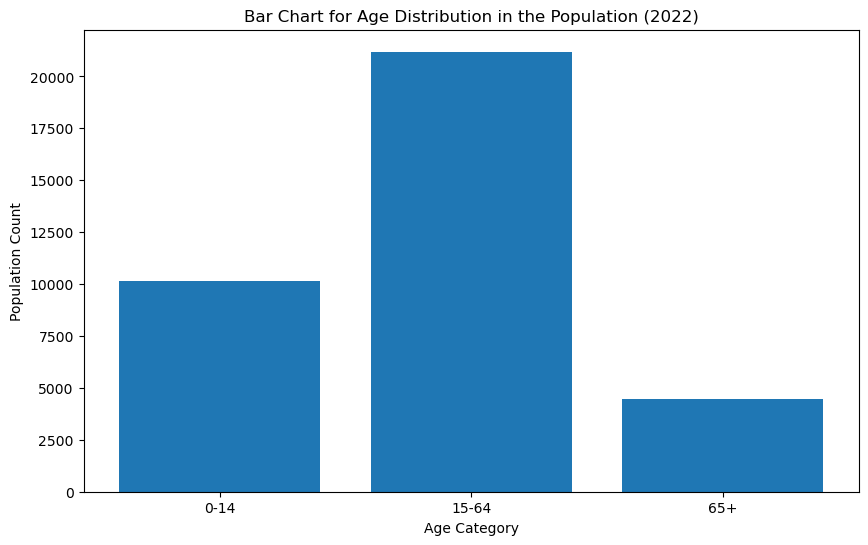

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("population.xls")

# Convert columns to numeric
df['Population age composition'] = pd.to_numeric(df['Population age composition'], errors='coerce')
df['Unnamed: 5'] = pd.to_numeric(df['Unnamed: 5'], errors='coerce')
df['Unnamed: 6'] = pd.to_numeric(df['Unnamed: 6'], errors='coerce')

# Calculate the median values
median_age_column5 = df['Population age composition'].median()
median_age_column6 = df['Unnamed: 5'].median()
median_age_column7 = df['Unnamed: 6'].median()

# Fill missing values with median
df['Population age composition'] = df['Population age composition'].fillna(median_age_column5)
df['Unnamed: 5'] = df['Unnamed: 5'].fillna(median_age_column6)
df['Unnamed: 6'] = df['Unnamed: 6'].fillna(median_age_column7)

# Define age categories
age_categories = ['0-14', '15-64', '65+']

# Create a copy of the DataFrame for the selected columns
df_stacked = df[['Population age composition', 'Unnamed: 5', 'Unnamed: 6']].copy()
df_stacked.columns = age_categories

# Calculate the total population for each age category
total_population = df_stacked.sum()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(age_categories, total_population)
plt.xlabel('Age Category')
plt.ylabel('Population Count')
plt.title('Bar Chart for Age Distribution in the Population (2022)')
plt.show()
